OpenCV-图像阈值

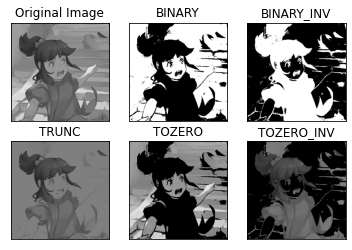

In [4]:
import cv2
import numpy as np

import os
import matplotlib.pyplot as plt

img_gray = cv2.imread('huigirl.jpg')
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

title = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
image = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(image[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [7]:
img =cv2.imread('zaoyinwoman.png')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#均值滤波
#简单的平均卷积操作
blur = cv2.blur(img,(1,1))


cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#方框滤波 做法和刚才的均值滤波一样，但是多一个参数
#基本和均值一样，可以选择归一化
import cv2
box = cv2.boxFilter(img,1,(3,3),normalize=True)

cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:/Users/runneradmin/AppData/Local/Temp/pip-req-build-q3d_8t8e/opencv/modules/imgproc/src/box_filter.simd.hpp:1246: error: (-213:The function/feature is not implemented) Unsupported combination of sum format (=20), and destination format (=17) in function 'cv::opt_AVX2::getColumnSumFilter'


In [14]:
#高斯滤波
#高斯模糊的卷积核里的熟知是满足高斯分布，相当于更注重中间值
aussian = cv2.GaussianBlur(img,(5,5),1)

cv2.imshow('aussian',aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#中值滤波
median = cv2.medianBlur(img,5)

cv2.imshow('median',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
#展示所有的
cv2.imshow('blur,aussian,median', np.hstack((blur,aussian,median)))
cv2.waitKey(0)
cv2.destroyAllWindows()

Canny边缘检测

In [3]:
def cv_show(name,image):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destoryAllWindows()

In [14]:
import cv2
import numpy as np
img= cv2.imread('huigirl.jpg',cv2.IMREAD_GRAYSCALE)

v1=cv2.Canny(img,140,250)
v2=cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv_show('res',res)

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

In [3]:
import cv2
import numpy as np
def cv_show(name,image):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destoryAllWindows()
img = cv2.imread('girl.png')
cv_show('img',img)
print(img.shape)

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

In [2]:
print(img.shape)

(327, 328, 3)


In [6]:
up = cv2.pyrUp(img)
cv_show('up',up)
print(up.shape)

NameError: name 'img' is not defined

In [26]:
print(up.shape)

(654, 656, 3)


In [10]:
down = cv2.pyrDown(up)
cv_show('down',down)
print(down.shape)

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

In [28]:
print(down.shape)

(164, 164, 3)


In [20]:
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
tupian = img-down_up 
cv_show('tupian',tupian)

ValueError: operands could not be broadcast together with shapes (327,328,3) (328,328,3) 

In [29]:
import cv2
import numpy as np

def cv_show(img, name):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# 第一步读入图片
img = cv2.imread('girl.png')
# 第二步：对图片做灰度变化
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 第三步：对图片做二值变化
ret,thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 第四步：获得图片的轮廓值
contours,h = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# 第五步：在图片中画出图片的轮廓值
draw_img = img.copy()
ret = cv2.drawContours(draw_img, contours,24, (0, 0, 255), 6)
# 第六步：画出带有轮廓的原始图片
cv_show(ret, 'ret')

In [19]:
cnt = contours[24]

In [26]:
#面积
area = cv2.contourArea(cnt)
area

852.5

In [27]:
length= cv2.arcLength(cnt, True)
print(area, length)

852.5 137.18376553058624


In [35]:
# 轮廓近似
img = cv2.imread('girl.png')#读入图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#灰度图
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)#二值变化

contours, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)#获得图片的轮廓值

cnt = contours[24]

# 使用周长的倍数作为阈值，阈值越小，图像的轮廓近似与轮廓越近似
epsilon = 0.1* cv2.arcLength(cnt, True)

approx = cv2.approxPolyDP(cnt, epsilon, True)

draw_img = img.copy()
ret = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(ret, 'ret')

In [38]:
# 外接矩阵

img = cv2.imread('girl.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

contours, h = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt = contours[24]

x, y, w, h = cv2.boundingRect(cnt)

ret = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
cv_show(ret, 'ret')

print('矩形面积 / 外接矩形面积', cv2.contourArea(cnt) / (w*h))

矩形面积 / 外接矩形面积 0.6702044025157232


In [39]:
#外接圆
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
ret = cv2.circle(ret, center, radius, (0, 255, 0), 2)
cv_show(ret, 'ret')

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读入图片，模板个原图
original = cv2.imread('girl.png')
img = cv2.imread('girl.png', 0)
template = cv2.imread('girlFace.png', 0)

In [61]:
template.shape

(67, 69)

In [62]:
img.shape

(327, 328)

In [63]:
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED']

In [64]:
ret = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

In [65]:
ret.shape

(261, 260)

In [66]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ret)

In [67]:
min_val

-0.45760592818260193

In [68]:
max_val

1.0

In [69]:
min_loc

(1, 145)

In [70]:
max_loc

(124, 129)

In [75]:
draw_img = original.copy()
ret = cv2.rectangle(draw_img, max_loc, (max_loc[0]+w, max_loc[1]+h), (0, 0, 255), 2)
cv2.imshow('ret', ret)
cv2.waitKey(0)
cv2.destroyAllWindows()

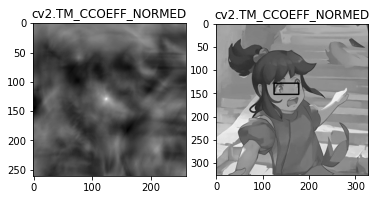

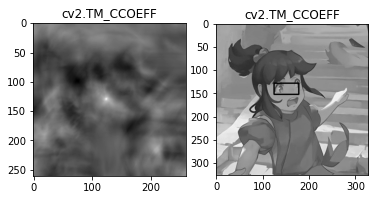

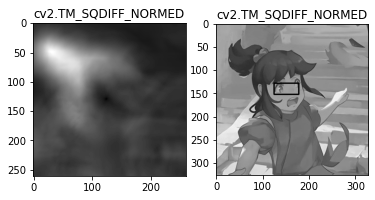

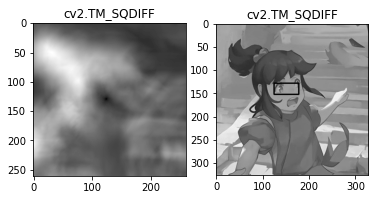

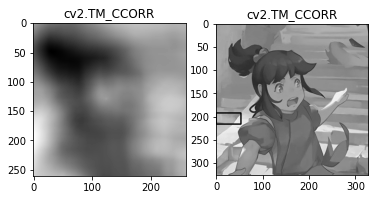

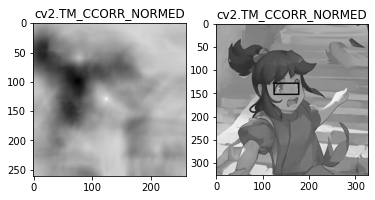

In [74]:
for method in methods:
    draw_img = img.copy()
    
    #匹配方法的真值
    op = eval(method)
    ret = cv2.matchTemplate(img, template, op)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ret)
    
    #如果是平方差匹配cv2.TM_SQDIFF或归一化平方差匹配'cv2.TM_SQDIFF_NORMED，取最小值
    if method in ['cv2.TM_SQDIFF_NORMED', 'cv2.TM_SQDIFF']: #指定为实际的方法，不能是字符串
        loc = min_loc
    else:
        loc = max_loc
    rect = cv2.rectangle(draw_img, loc, (loc[0] + w, loc[1] + h), (0, 0, 255), 2)#左上角这个点，弄出这个框框
    
    plt.subplot(121)
    plt.imshow(ret, cmap='gray')
    plt.title(method)
    plt.subplot(122)
    plt.imshow(rect, cmap='gray')
    plt.title(method)
    plt.show()

In [79]:
original = cv2.imread('maliao.png')
img = cv2.imread('maliao.png', 0)
template = cv2.imread('maliaojinbi.png', 0)
h, w = template.shape[:2]
ret = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)

index = np.where(ret > 0.8)

draw_img = original.copy()
for i in zip(*index[::-1]):
    rect = cv2.rectangle(draw_img, i, (i[0]+w, i[1]+h), (0, 0, 255), 1)

cv2.imshow('rect', np.hstack((original, rect)))
cv2.waitKey(0)
cv2.destroyAllWindows()